In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_csv('/Users/Enes/Documents/Daten_Projektarbeit/pca_df.csv', encoding="UTF-8")
data.head()

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2
0,David Abraham,DF,Eint Frankfurt,33,18.8,0.099099,0.077778,0.000000,0.58,0.50,0.486842,0.721675,0.033639,0.348126,0.123746,0.000000,0.108856,0.58875,0.613475,0.430108,0.392388,0.117073,0.091331,0.818,0.135945,0.224,0.018519,0.253756,0.039823,0.713376,0.737095,False,-0.637159,-0.149423
1,Manuel Akanji,DF,Dortmund,24,25.7,0.000000,0.033333,0.058824,0.00,0.00,0.407895,0.938424,0.036697,0.350099,0.026756,0.000000,0.071956,0.70875,0.652482,0.349462,0.746719,0.075610,0.072755,0.667,0.080645,0.116,0.000000,0.781302,0.000000,0.481688,0.683073,False,-0.912250,0.178387
2,Kevin Akpoguma,DF,Hoffenheim,24,12.7,0.000000,0.011111,0.000000,0.00,0.00,0.434211,0.834975,0.024465,0.148915,0.026756,0.000000,0.057196,0.58625,0.457447,0.440860,0.581365,0.058537,0.047988,0.750,0.055300,0.158,0.000000,0.517529,0.011799,0.524682,0.536615,False,-0.793499,-0.102958
3,David Alaba,DF,Bayern Munich,27,27.8,0.036036,0.033333,0.137255,0.12,0.14,0.460526,0.918719,0.198777,1.000000,0.287625,0.190840,0.252768,0.52125,0.648936,0.188172,0.900262,0.053659,0.055728,0.600,0.057604,0.266,0.025926,0.946578,0.132743,0.705414,0.539016,False,-0.743370,0.681809
4,Angeliño,DF,RB Leipzig,22,12.2,0.072072,0.066667,0.372549,0.40,0.50,0.473684,0.544335,0.501529,0.358974,0.632107,0.625954,0.590406,0.43750,0.680851,0.413978,0.601050,0.419512,0.342105,0.778,0.414747,0.442,0.244444,0.432387,0.532448,0.535828,0.462185,True,0.356193,0.723503


In [2]:
pcas = data[['PC1', 'PC2']]
pcas.head()

,PC1,PC2
0,-0.637159,-0.149423
1,-0.912250,0.178387
2,-0.793499,-0.102958
3,-0.743370,0.681809
4,0.356193,0.723503


Text(0, 0.5, 'Inertia')

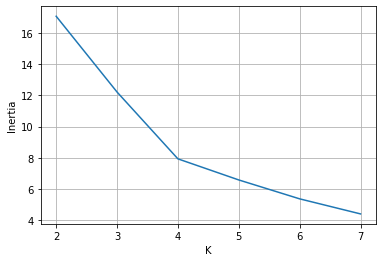

In [3]:
inertias = []
clusters = range(2, 8)
for k in clusters:
    k2 = KMeans(n_clusters=k)
    k2.fit(pcas)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6,4))
pd.Series(inertias, index=clusters).plot(ax=ax)
plt.grid()
ax.set_xlabel('K')
ax.set_ylabel('Inertia')

In [4]:
# nach K=4 nur noch geringe Abnahme, daher werden K=4 Cluster erstellt.
km = KMeans(4)
km.fit(pcas)
KMeans(algorithm='auto', copy_x=True, init='k-means', 
      max_iter=300, n_clusters=4, n_init=10, n_jobs=1,
      precompute_distances='auto')
X_km = km.predict(pcas)
X_km

array([0, 2, 0, 2, 3, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 3, 0, 1, 1, 3, 0,
       3, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 3, 0, 3, 3, 1, 2, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 3, 3, 2, 1, 0, 0,
       1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 3, 0, 0, 0, 1, 2, 2, 3, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1,
       1, 2, 1], dtype=int32)

In [5]:
clusters = pd.DataFrame(X_km)
data = pd.concat([data, clusters], axis=1)
data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2,0
0,David Abraham,DF,Eint Frankfurt,33,18.8,0.099099,0.077778,0.000000,0.58,0.50,0.486842,0.721675,0.033639,0.348126,0.123746,0.000000,0.108856,0.58875,0.613475,0.430108,0.392388,0.117073,0.091331,0.818,0.135945,0.224,0.018519,0.253756,0.039823,0.713376,0.737095,False,-0.637159,-0.149423,0
1,Manuel Akanji,DF,Dortmund,24,25.7,0.000000,0.033333,0.058824,0.00,0.00,0.407895,0.938424,0.036697,0.350099,0.026756,0.000000,0.071956,0.70875,0.652482,0.349462,0.746719,0.075610,0.072755,0.667,0.080645,0.116,0.000000,0.781302,0.000000,0.481688,0.683073,False,-0.912250,0.178387,2
2,Kevin Akpoguma,DF,Hoffenheim,24,12.7,0.000000,0.011111,0.000000,0.00,0.00,0.434211,0.834975,0.024465,0.148915,0.026756,0.000000,0.057196,0.58625,0.457447,0.440860,0.581365,0.058537,0.047988,0.750,0.055300,0.158,0.000000,0.517529,0.011799,0.524682,0.536615,False,-0.793499,-0.102958,0
3,David Alaba,DF,Bayern Munich,27,27.8,0.036036,0.033333,0.137255,0.12,0.14,0.460526,0.918719,0.198777,1.000000,0.287625,0.190840,0.252768,0.52125,0.648936,0.188172,0.900262,0.053659,0.055728,0.600,0.057604,0.266,0.025926,0.946578,0.132743,0.705414,0.539016,False,-0.743370,0.681809,2
4,Angeliño,DF,RB Leipzig,22,12.2,0.072072,0.066667,0.372549,0.40,0.50,0.473684,0.544335,0.501529,0.358974,0.632107,0.625954,0.590406,0.43750,0.680851,0.413978,0.601050,0.419512,0.342105,0.778,0.414747,0.442,0.244444,0.432387,0.532448,0.535828,0.462185,True,0.356193,0.723503,3
5,Ludwig Augustinsson,DF,Werder Bremen,25,10.3,0.000000,0.022222,0.215686,0.00,0.00,0.421053,0.467980,0.474006,0.098619,0.324415,0.442748,0.357934,0.50750,0.492908,0.392473,0.490814,0.141463,0.134675,0.667,0.156682,0.428,0.107407,0.277129,0.501475,0.422771,0.699880,False,-0.041430,0.184982,1
6,Kaan Ayhan,DF,Düsseldorf,24,30.3,0.063063,0.088889,0.156863,0.14,0.50,0.421053,0.746305,0.171254,0.384615,0.143813,0.076336,0.188192,0.59250,0.617021,0.629032,0.517060,0.087805,0.066563,0.846,0.082949,0.192,0.037037,0.455760,0.082596,0.509554,0.537815,False,-0.605667,0.071381,0
7,Ridle Baku,DF,Mainz 05,21,26.1,0.036036,0.044444,0.235294,0.10,0.17,0.447368,0.448276,0.293578,0.192308,0.488294,0.496183,0.459410,0.45500,0.287234,0.715054,0.409449,0.290244,0.373065,0.492,0.336406,0.376,0.070370,0.225376,0.384956,0.633758,0.459784,False,0.129229,0.276687,1
8,Lars Bender,DF,Leverkusen,30,15.3,0.117117,0.055556,0.137255,0.26,1.00,0.552632,0.780788,0.339450,0.295858,0.260870,0.099237,0.337638,0.54000,0.549645,0.607527,0.725722,0.190244,0.162539,0.750,0.195853,0.510,0.096296,0.559265,0.182891,0.601911,0.560624,False,-0.345359,0.396680,1
9,Sven Bender,DF,Leverkusen,30,30.3,0.063063,0.044444,0.000000,0.22,0.50,0.473684,0.967980,0.030581,0.189349,0.043478,0.000000,0.079336,0.61375,0.730496,0.844086,0.883202,0.041463,0.026316,1.000,0.039171,0.020,0.011111,0.831386,0.004425,0.785032,0.806723,False,-1.178551,0.329408,2


In [6]:
data.rename(columns={0: 'Cluster'}, inplace=True)
data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,PC1,PC2,Cluster
0,David Abraham,DF,Eint Frankfurt,33,18.8,0.099099,0.077778,0.000000,0.58,0.50,0.486842,0.721675,0.033639,0.348126,0.123746,0.000000,0.108856,0.58875,0.613475,0.430108,0.392388,0.117073,0.091331,0.818,0.135945,0.224,0.018519,0.253756,0.039823,0.713376,0.737095,False,-0.637159,-0.149423,0
1,Manuel Akanji,DF,Dortmund,24,25.7,0.000000,0.033333,0.058824,0.00,0.00,0.407895,0.938424,0.036697,0.350099,0.026756,0.000000,0.071956,0.70875,0.652482,0.349462,0.746719,0.075610,0.072755,0.667,0.080645,0.116,0.000000,0.781302,0.000000,0.481688,0.683073,False,-0.912250,0.178387,2
2,Kevin Akpoguma,DF,Hoffenheim,24,12.7,0.000000,0.011111,0.000000,0.00,0.00,0.434211,0.834975,0.024465,0.148915,0.026756,0.000000,0.057196,0.58625,0.457447,0.440860,0.581365,0.058537,0.047988,0.750,0.055300,0.158,0.000000,0.517529,0.011799,0.524682,0.536615,False,-0.793499,-0.102958,0
3,David Alaba,DF,Bayern Munich,27,27.8,0.036036,0.033333,0.137255,0.12,0.14,0.460526,0.918719,0.198777,1.000000,0.287625,0.190840,0.252768,0.52125,0.648936,0.188172,0.900262,0.053659,0.055728,0.600,0.057604,0.266,0.025926,0.946578,0.132743,0.705414,0.539016,False,-0.743370,0.681809,2
4,Angeliño,DF,RB Leipzig,22,12.2,0.072072,0.066667,0.372549,0.40,0.50,0.473684,0.544335,0.501529,0.358974,0.632107,0.625954,0.590406,0.43750,0.680851,0.413978,0.601050,0.419512,0.342105,0.778,0.414747,0.442,0.244444,0.432387,0.532448,0.535828,0.462185,True,0.356193,0.723503,3
5,Ludwig Augustinsson,DF,Werder Bremen,25,10.3,0.000000,0.022222,0.215686,0.00,0.00,0.421053,0.467980,0.474006,0.098619,0.324415,0.442748,0.357934,0.50750,0.492908,0.392473,0.490814,0.141463,0.134675,0.667,0.156682,0.428,0.107407,0.277129,0.501475,0.422771,0.699880,False,-0.041430,0.184982,1
6,Kaan Ayhan,DF,Düsseldorf,24,30.3,0.063063,0.088889,0.156863,0.14,0.50,0.421053,0.746305,0.171254,0.384615,0.143813,0.076336,0.188192,0.59250,0.617021,0.629032,0.517060,0.087805,0.066563,0.846,0.082949,0.192,0.037037,0.455760,0.082596,0.509554,0.537815,False,-0.605667,0.071381,0
7,Ridle Baku,DF,Mainz 05,21,26.1,0.036036,0.044444,0.235294,0.10,0.17,0.447368,0.448276,0.293578,0.192308,0.488294,0.496183,0.459410,0.45500,0.287234,0.715054,0.409449,0.290244,0.373065,0.492,0.336406,0.376,0.070370,0.225376,0.384956,0.633758,0.459784,False,0.129229,0.276687,1
8,Lars Bender,DF,Leverkusen,30,15.3,0.117117,0.055556,0.137255,0.26,1.00,0.552632,0.780788,0.339450,0.295858,0.260870,0.099237,0.337638,0.54000,0.549645,0.607527,0.725722,0.190244,0.162539,0.750,0.195853,0.510,0.096296,0.559265,0.182891,0.601911,0.560624,False,-0.345359,0.396680,1
9,Sven Bender,DF,Leverkusen,30,30.3,0.063063,0.044444,0.000000,0.22,0.50,0.473684,0.967980,0.030581,0.189349,0.043478,0.000000,0.079336,0.61375,0.730496,0.844086,0.883202,0.041463,0.026316,1.000,0.039171,0.020,0.011111,0.831386,0.004425,0.785032,0.806723,False,-1.178551,0.329408,2


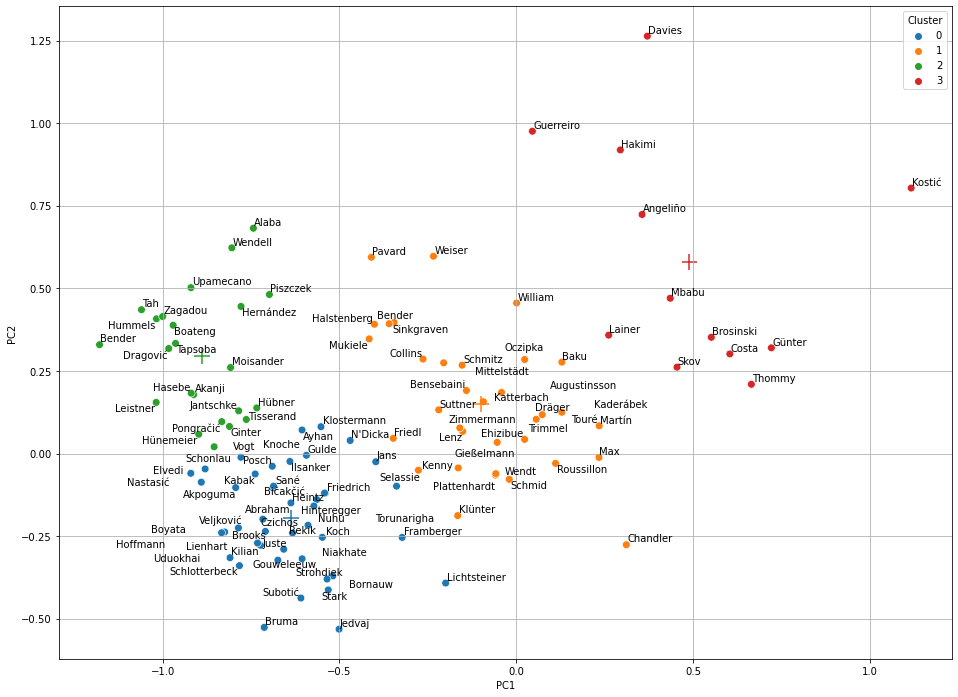

In [7]:
from adjustText import adjust_text
import seaborn as sns

x=data['PC1']
y=data['PC2']
colors = ['tab:blue','tab:orange','tab:green','tab:red']

plt.figure(figsize=(16,12))
plt.grid()
sns.scatterplot(x=x, y=y, hue=data['Cluster'], s=60, palette='tab10')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='+', s=250, c=colors)

surnames = data['Player'].str.split(' ').str[-1]
labels = [plt.text(x_coor, y_coor, f'{i}') for (x_coor, y_coor, i) in zip(x, y, surnames)]

adjust_text(labels)
plt.savefig('K_DF.png')
plt.show()

In [8]:
org_data = pd.read_csv('/Users/Enes/Documents/Daten_Projektarbeit/data_df.csv', encoding="UTF-8")
org_data.head()

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered
0,David Abraham,DF,Eint Frankfurt,33,18.8,0.11,0.07,0.00,0.29,0.50,0.03,82.8,0.11,3.99,0.37,0.00,0.59,47.1,37.5,0.85,57.1,0.48,0.59,81.8,0.59,1.12,0.05,32.9,0.27,11.90,61.4,False
1,Manuel Akanji,DF,Dortmund,24,25.7,0.00,0.03,0.03,0.00,0.00,-0.03,91.6,0.12,4.01,0.08,0.00,0.39,56.7,38.6,0.70,84.1,0.31,0.47,66.7,0.35,0.58,0.00,64.5,0.00,8.99,56.9,False
2,Kevin Akpoguma,DF,Hoffenheim,24,12.7,0.00,0.01,0.00,0.00,NaN,-0.01,87.4,0.08,1.97,0.08,0.00,0.31,46.9,33.1,0.87,71.5,0.24,0.31,75.0,0.24,0.79,0.00,48.7,0.08,9.53,44.7,False
3,David Alaba,DF,Bayern Munich,27,27.8,0.04,0.03,0.07,0.06,0.14,0.01,90.8,0.65,10.60,0.86,0.25,1.37,41.7,38.5,0.40,95.8,0.22,0.36,60.0,0.25,1.33,0.07,74.4,0.90,11.80,44.9,False
4,Angeliño,DF,RB Leipzig,22,12.2,0.08,0.06,0.19,0.20,0.50,0.02,75.6,1.64,4.10,1.89,0.82,3.20,35.0,39.4,0.82,73.0,1.72,2.21,77.8,1.80,2.21,0.66,43.6,3.61,9.67,38.5,True


In [9]:
org_data = pd.concat([org_data, clusters], axis=1)
org_data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,0
0,David Abraham,DF,Eint Frankfurt,33,18.8,0.11,0.07,0.00,0.29,0.50,0.03,82.8,0.11,3.99,0.37,0.00,0.59,47.1,37.5,0.85,57.1,0.48,0.59,81.8,0.59,1.12,0.05,32.9,0.27,11.90,61.4,False,0
1,Manuel Akanji,DF,Dortmund,24,25.7,0.00,0.03,0.03,0.00,0.00,-0.03,91.6,0.12,4.01,0.08,0.00,0.39,56.7,38.6,0.70,84.1,0.31,0.47,66.7,0.35,0.58,0.00,64.5,0.00,8.99,56.9,False,2
2,Kevin Akpoguma,DF,Hoffenheim,24,12.7,0.00,0.01,0.00,0.00,NaN,-0.01,87.4,0.08,1.97,0.08,0.00,0.31,46.9,33.1,0.87,71.5,0.24,0.31,75.0,0.24,0.79,0.00,48.7,0.08,9.53,44.7,False,0
3,David Alaba,DF,Bayern Munich,27,27.8,0.04,0.03,0.07,0.06,0.14,0.01,90.8,0.65,10.60,0.86,0.25,1.37,41.7,38.5,0.40,95.8,0.22,0.36,60.0,0.25,1.33,0.07,74.4,0.90,11.80,44.9,False,2
4,Angeliño,DF,RB Leipzig,22,12.2,0.08,0.06,0.19,0.20,0.50,0.02,75.6,1.64,4.10,1.89,0.82,3.20,35.0,39.4,0.82,73.0,1.72,2.21,77.8,1.80,2.21,0.66,43.6,3.61,9.67,38.5,True,3
5,Ludwig Augustinsson,DF,Werder Bremen,25,10.3,0.00,0.02,0.11,0.00,NaN,-0.02,72.5,1.55,1.46,0.97,0.58,1.94,40.6,34.1,0.78,64.6,0.58,0.87,66.7,0.68,2.14,0.29,34.3,3.40,8.25,58.3,False,1
6,Kaan Ayhan,DF,Düsseldorf,24,30.3,0.07,0.08,0.08,0.07,0.50,-0.02,83.8,0.56,4.36,0.43,0.10,1.02,47.4,37.6,1.22,66.6,0.36,0.43,84.6,0.36,0.96,0.10,45.0,0.56,9.34,44.8,False,0
7,Ridle Baku,DF,Mainz 05,21,26.1,0.04,0.04,0.12,0.05,0.17,0.00,71.7,0.96,2.41,1.46,0.65,2.49,36.4,28.3,1.38,58.4,1.19,2.41,49.2,1.46,1.88,0.19,31.2,2.61,10.90,38.3,False,1
8,Lars Bender,DF,Leverkusen,30,15.3,0.13,0.05,0.07,0.13,1.00,0.08,85.2,1.11,3.46,0.78,0.13,1.83,43.2,35.7,1.18,82.5,0.78,1.05,75.0,0.85,2.55,0.26,51.2,1.24,10.50,46.7,False,1
9,Sven Bender,DF,Leverkusen,30,30.3,0.07,0.04,0.00,0.11,0.50,0.02,92.8,0.10,2.38,0.13,0.00,0.43,49.1,40.8,1.62,94.5,0.17,0.17,100.0,0.17,0.10,0.03,67.5,0.03,12.80,67.2,False,2


In [10]:
org_data.rename(columns={0: 'Cluster'}, inplace=True)
org_data

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
0,David Abraham,DF,Eint Frankfurt,33,18.8,0.11,0.07,0.00,0.29,0.50,0.03,82.8,0.11,3.99,0.37,0.00,0.59,47.1,37.5,0.85,57.1,0.48,0.59,81.8,0.59,1.12,0.05,32.9,0.27,11.90,61.4,False,0
1,Manuel Akanji,DF,Dortmund,24,25.7,0.00,0.03,0.03,0.00,0.00,-0.03,91.6,0.12,4.01,0.08,0.00,0.39,56.7,38.6,0.70,84.1,0.31,0.47,66.7,0.35,0.58,0.00,64.5,0.00,8.99,56.9,False,2
2,Kevin Akpoguma,DF,Hoffenheim,24,12.7,0.00,0.01,0.00,0.00,NaN,-0.01,87.4,0.08,1.97,0.08,0.00,0.31,46.9,33.1,0.87,71.5,0.24,0.31,75.0,0.24,0.79,0.00,48.7,0.08,9.53,44.7,False,0
3,David Alaba,DF,Bayern Munich,27,27.8,0.04,0.03,0.07,0.06,0.14,0.01,90.8,0.65,10.60,0.86,0.25,1.37,41.7,38.5,0.40,95.8,0.22,0.36,60.0,0.25,1.33,0.07,74.4,0.90,11.80,44.9,False,2
4,Angeliño,DF,RB Leipzig,22,12.2,0.08,0.06,0.19,0.20,0.50,0.02,75.6,1.64,4.10,1.89,0.82,3.20,35.0,39.4,0.82,73.0,1.72,2.21,77.8,1.80,2.21,0.66,43.6,3.61,9.67,38.5,True,3
5,Ludwig Augustinsson,DF,Werder Bremen,25,10.3,0.00,0.02,0.11,0.00,NaN,-0.02,72.5,1.55,1.46,0.97,0.58,1.94,40.6,34.1,0.78,64.6,0.58,0.87,66.7,0.68,2.14,0.29,34.3,3.40,8.25,58.3,False,1
6,Kaan Ayhan,DF,Düsseldorf,24,30.3,0.07,0.08,0.08,0.07,0.50,-0.02,83.8,0.56,4.36,0.43,0.10,1.02,47.4,37.6,1.22,66.6,0.36,0.43,84.6,0.36,0.96,0.10,45.0,0.56,9.34,44.8,False,0
7,Ridle Baku,DF,Mainz 05,21,26.1,0.04,0.04,0.12,0.05,0.17,0.00,71.7,0.96,2.41,1.46,0.65,2.49,36.4,28.3,1.38,58.4,1.19,2.41,49.2,1.46,1.88,0.19,31.2,2.61,10.90,38.3,False,1
8,Lars Bender,DF,Leverkusen,30,15.3,0.13,0.05,0.07,0.13,1.00,0.08,85.2,1.11,3.46,0.78,0.13,1.83,43.2,35.7,1.18,82.5,0.78,1.05,75.0,0.85,2.55,0.26,51.2,1.24,10.50,46.7,False,1
9,Sven Bender,DF,Leverkusen,30,30.3,0.07,0.04,0.00,0.11,0.50,0.02,92.8,0.10,2.38,0.13,0.00,0.43,49.1,40.8,1.62,94.5,0.17,0.17,100.0,0.17,0.10,0.03,67.5,0.03,12.80,67.2,False,2


In [11]:
org_data
org_data.to_csv('/Users/Enes/Documents/Daten_Projektarbeit/data_df.csv', encoding="UTF-8")

In [12]:
average = data.assign(cluster=clusters).groupby('cluster').agg('mean', 'var').T
average

cluster,0,1,2,3
Age,25.113636,25.235294,27.043478,24.250000
90s,20.938636,21.794118,19.143478,24.758333
Gls,0.055897,0.065183,0.026244,0.120120
xG,0.052778,0.061111,0.042029,0.111111
xA,0.052585,0.179354,0.077579,0.344771
G/Sh,0.237273,0.153529,0.105217,0.260000
G/SoT,0.372045,0.319706,0.135217,0.361667
G-xG,0.465909,0.469427,0.437643,0.494518
Cmp%,0.728448,0.519197,0.845363,0.487069
KP,0.073116,0.309768,0.097992,0.508665


In [13]:
defending = average.iloc[[14,15,16,26,27]]
defending

cluster,0,1,2,3
Tkl%,0.545227,0.530110,0.615054,0.522188
%,0.485816,0.393200,0.665742,0.481678
Int,0.501955,0.493675,0.542076,0.356183
Recov,0.556836,0.520373,0.715522,0.471006
Won%,0.728337,0.615952,0.740540,0.541417


In [14]:
passing = average.iloc[[4,9,11,12,13]]
passing

cluster,0,1,2,3
xA,0.052585,0.179354,0.077579,0.344771
KP,0.073116,0.309768,0.097992,0.508665
PPA,0.081104,0.326087,0.107460,0.525084
CrsPA,0.046495,0.360799,0.030866,0.620865
SCA,0.120723,0.335576,0.151292,0.562269


In [15]:
dribbling = average.iloc[[17,18,19,21,22,23]]
dribbling

cluster,0,1,2,3
Touches,0.446642,0.500772,0.749059,0.543307
Succ,0.086585,0.208321,0.100424,0.453049
Att,0.077751,0.230468,0.082178,0.471233
#Pl,0.085411,0.208932,0.100180,0.460637
Carr into 1/3,0.108682,0.307824,0.146957,0.456167
CPA,0.015404,0.079521,0.016747,0.290123


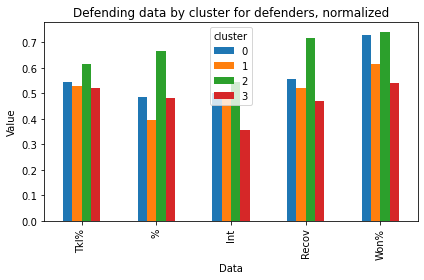

In [24]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
defending.plot(kind='bar', color=colors)
plt.title("Defending data by cluster for defenders, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('DF_Defending.png')

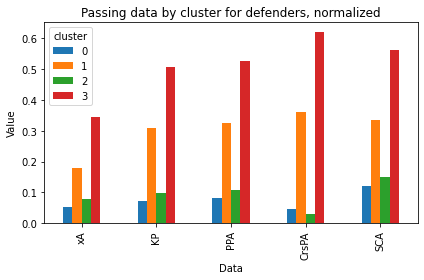

In [25]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
passing.plot(kind='bar', color=colors)
plt.title("Passing data by cluster for defenders, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('DF_Passes.png')

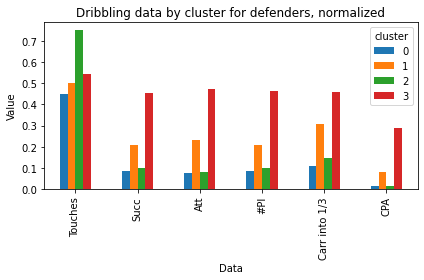

In [26]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
dribbling.plot(kind='bar', color=colors)
plt.title("Dribbling data by cluster for defenders, normalized")
plt.xlabel("Data")
plt.ylabel("Value")
plt.tight_layout()
plt.savefig('DF_dribbling.png')

In [19]:
org_data[org_data['Cluster'] == 0]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
0,David Abraham,DF,Eint Frankfurt,33,18.8,0.11,0.07,0.00,0.29,0.50,0.03,82.8,0.11,3.99,0.37,0.00,0.59,47.1,37.5,0.85,57.1,0.48,0.59,81.8,0.59,1.12,0.05,32.9,0.27,11.90,61.4,False,0
2,Kevin Akpoguma,DF,Hoffenheim,24,12.7,0.00,0.01,0.00,0.00,NaN,-0.01,87.4,0.08,1.97,0.08,0.00,0.31,46.9,33.1,0.87,71.5,0.24,0.31,75.0,0.24,0.79,0.00,48.7,0.08,9.53,44.7,False,0
6,Kaan Ayhan,DF,Düsseldorf,24,30.3,0.07,0.08,0.08,0.07,0.50,-0.02,83.8,0.56,4.36,0.43,0.10,1.02,47.4,37.6,1.22,66.6,0.36,0.43,84.6,0.36,0.96,0.10,45.0,0.56,9.34,44.8,False,0
11,Ermin Bičakčić,DF,Hoffenheim,29,13.1,0.15,0.04,0.03,0.25,1.00,0.11,88.8,0.15,2.98,0.31,0.00,0.53,41.7,34.8,0.99,72.5,0.08,0.23,33.3,0.08,0.84,0.08,50.5,0.23,8.85,75.0,False,0
13,Sebastiaan Bornauw,DF,Köln,20,27.2,0.22,0.10,0.02,0.33,0.86,0.12,82.0,0.18,2.43,0.22,0.07,0.51,38.9,34.8,0.92,55.0,0.26,0.40,63.6,0.26,0.37,0.00,35.4,0.18,8.79,63.3,False,0
14,Dedryck Boyata,DF,Hertha BSC,28,27.1,0.15,0.05,0.04,0.22,1.00,0.09,90.6,0.11,1.66,0.04,0.00,0.22,44.4,32.5,1.73,62.2,0.44,0.44,100.0,0.44,0.07,0.00,41.5,0.00,7.79,74.3,False,0
15,John Brooks,DF,Wolfsburg,26,24.7,0.00,0.05,0.02,0.00,0.00,-0.06,83.3,0.16,2.51,0.16,0.00,0.57,37.5,33.2,0.85,59.9,0.20,0.24,83.3,0.20,0.04,0.00,33.5,0.08,13.00,69.7,False,0
17,Jeffrey Bruma,DF,Mainz 05,27,7.5,0.00,0.05,0.00,0.00,NaN,-0.05,88.2,0.00,2.00,0.00,0.00,0.00,14.3,28.4,0.27,52.3,0.13,0.13,100.0,0.13,0.13,0.00,29.2,0.00,10.30,70.2,True,0
21,Rafael Czichos,DF,Köln,29,24.5,0.04,0.05,0.01,0.09,0.17,-0.01,83.9,0.12,2.82,0.12,0.00,0.61,39.5,37.6,0.57,60.1,0.20,0.29,71.4,0.20,0.78,0.00,34.4,0.16,11.20,60.4,False,0
26,Nico Elvedi,DF,M'Gladbach,22,29.1,0.03,0.02,0.00,0.13,1.00,0.01,92.2,0.03,1.31,0.00,0.00,0.27,45.5,42.3,1.03,69.5,0.27,0.31,88.9,0.27,0.41,0.00,45.8,0.03,11.90,60.0,False,0


In [20]:
org_data[org_data['Cluster'] == 1]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
5,Ludwig Augustinsson,DF,Werder Bremen,25,10.3,0.00,0.02,0.11,0.00,NaN,-0.02,72.5,1.55,1.46,0.97,0.58,1.94,40.6,34.1,0.78,64.6,0.58,0.87,66.7,0.68,2.14,0.29,34.3,3.40,8.25,58.3,False,1
7,Ridle Baku,DF,Mainz 05,21,26.1,0.04,0.04,0.12,0.05,0.17,0.00,71.7,0.96,2.41,1.46,0.65,2.49,36.4,28.3,1.38,58.4,1.19,2.41,49.2,1.46,1.88,0.19,31.2,2.61,10.90,38.3,False,1
8,Lars Bender,DF,Leverkusen,30,15.3,0.13,0.05,0.07,0.13,1.00,0.08,85.2,1.11,3.46,0.78,0.13,1.83,43.2,35.7,1.18,82.5,0.78,1.05,75.0,0.85,2.55,0.26,51.2,1.24,10.50,46.7,False,1
10,Ramy Bensebaini,DF,M'Gladbach,24,16.1,0.31,0.22,0.16,0.15,0.43,0.09,79.0,0.81,2.55,0.56,0.25,1.43,43.8,26.8,1.86,71.7,1.37,2.30,59.5,1.49,1.61,0.25,40.2,1.30,9.57,64.6,False,1
18,Timothy Chandler,DF,Eint Frankfurt,29,13.6,0.37,0.13,0.07,0.26,0.63,0.24,62.8,0.88,1.91,1.40,1.03,1.69,46.7,26.2,0.44,43.3,0.29,0.74,40.0,0.37,1.03,0.22,26.1,3.46,6.40,58.3,False,1
19,Jamilu Collins,DF,Paderborn 07,24,29.6,0.03,0.06,0.05,0.06,1.00,-0.02,76.1,0.68,3.92,0.34,0.10,1.66,53.1,33.2,1.35,74.1,1.52,2.67,57.0,1.59,2.26,0.24,39.8,1.01,11.90,50.7,False,1
24,Mohamed Dräger,DF,Paderborn 07,23,16.2,0.06,0.08,0.05,0.07,0.33,-0.01,77.0,0.74,1.79,0.80,0.19,1.60,31.0,32.9,0.93,64.1,1.30,3.21,40.4,1.42,2.16,0.62,35.9,1.42,9.01,38.1,False,1
25,Kingsley Ehizibue,DF,Köln,24,25.9,0.04,0.04,0.05,0.08,0.25,0.00,74.8,0.66,1.70,0.77,0.35,1.54,59.6,28.4,1.08,58.8,1.39,2.51,55.4,1.51,1.70,0.39,30.9,1.93,7.76,64.6,False,1
28,Marco Friedl,DF,Werder Bremen,21,24.3,0.04,0.05,0.08,0.08,0.33,-0.01,76.5,0.91,2.63,1.03,0.53,1.48,46.7,28.9,1.28,61.0,0.48,0.95,50.0,0.48,0.00,0.00,38.1,0.00,13.30,20.0,False,1
30,Niko Gießelmann,DF,Düsseldorf,27,22.9,0.04,0.03,0.07,0.07,0.33,0.02,75.6,1.09,2.79,1.22,0.57,1.57,44.2,25.8,0.74,60.2,0.35,0.70,50.0,0.39,1.09,0.00,32.2,1.97,8.69,63.5,False,1


In [21]:
org_data[org_data['Cluster'] == 2]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
1,Manuel Akanji,DF,Dortmund,24,25.7,0.00,0.03,0.03,0.00,0.00,-0.03,91.6,0.12,4.01,0.08,0.00,0.39,56.7,38.6,0.70,84.1,0.31,0.47,66.7,0.35,0.58,0.00,64.5,0.00,8.99,56.9,False,2
3,David Alaba,DF,Bayern Munich,27,27.8,0.04,0.03,0.07,0.06,0.14,0.01,90.8,0.65,10.60,0.86,0.25,1.37,41.7,38.5,0.40,95.8,0.22,0.36,60.0,0.25,1.33,0.07,74.4,0.90,11.80,44.9,False,2
9,Sven Bender,DF,Leverkusen,30,30.3,0.07,0.04,0.00,0.11,0.50,0.02,92.8,0.10,2.38,0.13,0.00,0.43,49.1,40.8,1.62,94.5,0.17,0.17,100.0,0.17,0.10,0.03,67.5,0.03,12.80,67.2,False,2
12,Jérôme Boateng,DF,Bayern Munich,30,20.0,0.00,0.02,0.07,0.00,0.00,-0.02,90.0,0.20,6.65,0.65,0.00,0.65,34.8,40.2,0.85,92.8,0.00,0.00,NaN,0.00,0.45,0.00,70.4,0.25,12.10,74.5,False,2
23,Aleksandar Dragović,DF,Leverkusen,28,11.4,0.00,0.04,0.01,0.00,NaN,-0.04,90.7,0.09,6.23,0.26,0.00,1.14,45.0,36.1,0.61,92.2,0.09,0.09,100.0,0.09,1.14,0.00,67.5,0.00,10.60,62.9,False,2
31,Matthias Ginter,DF,M'Gladbach,25,30.9,0.03,0.06,0.04,0.05,0.14,-0.02,85.9,0.19,3.92,0.32,0.00,0.78,41.2,36.4,0.74,79.1,0.19,0.26,75.0,0.19,0.61,0.03,57.6,0.10,10.40,61.9,False,2
38,Makoto Hasebe,DF,Eint Frankfurt,35,21.9,0.00,0.00,0.04,NaN,NaN,0.00,88.1,0.50,4.84,0.18,0.00,1.05,32.4,42.9,0.91,71.5,0.18,0.18,100.0,0.18,0.96,0.00,44.5,0.05,14.70,49.1,False,2
40,Lucas Hernández,DF,Bayern Munich,23,10.2,0.00,0.06,0.11,0.00,0.00,-0.06,88.3,0.39,4.41,0.29,0.00,0.78,60.0,36.0,0.98,90.7,0.98,1.08,90.9,0.98,1.27,0.20,67.2,0.69,9.51,77.8,False,2
43,Mats Hummels,DF,Dortmund,30,28.7,0.03,0.06,0.07,0.04,0.25,-0.02,88.4,0.31,4.53,0.42,0.03,0.77,43.2,43.3,1.22,90.2,0.28,0.35,80.0,0.31,0.59,0.00,62.3,0.17,13.60,71.0,False,2
44,Benjamin Hübner,DF,Hoffenheim,30,23.0,0.04,0.06,0.07,0.04,0.25,-0.02,86.9,0.35,4.96,0.61,0.04,0.83,44.7,33.2,0.96,80.3,0.22,0.39,55.6,0.26,0.61,0.00,60.0,0.13,8.30,68.8,False,2


In [22]:
org_data[org_data['Cluster'] == 3]

,Player,Pos,Squad,Age,90s,Gls,xG,xA,G/Sh,G/SoT,G-xG,Cmp%,KP,Passes into 1/3,PPA,CrsPA,SCA,Tkl%,%,Int,Touches,Succ,Att,Succ%,#Pl,Carr into 1/3,CPA,Rec,Crs,Recov,Won%,Transfered,Cluster
4,Angeliño,DF,RB Leipzig,22,12.2,0.08,0.06,0.19,0.20,0.50,0.02,75.6,1.64,4.10,1.89,0.82,3.20,35.0,39.4,0.82,73.0,1.72,2.21,77.8,1.80,2.21,0.66,43.6,3.61,9.67,38.5,True,3
16,Daniel Brosinski,DF,Mainz 05,31,19.0,0.11,0.09,0.19,0.05,0.14,0.02,62.9,2.84,2.63,1.89,0.63,4.47,42.1,29.7,0.42,66.8,0.68,1.37,50.0,0.89,1.47,0.47,29.6,4.37,9.05,45.2,False,3
20,Danny da Costa,DF,Eint Frankfurt,26,15.4,0.06,0.09,0.24,0.06,0.25,-0.02,65.2,1.36,1.23,2.01,1.17,2.60,45.5,29.6,0.71,52.3,1.49,2.60,57.5,1.62,1.23,0.78,29.7,4.29,7.21,50.0,False,3
22,Alphonso Davies,DF,Bayern Munich,18,24.8,0.12,0.09,0.15,0.25,0.60,0.04,86.4,1.33,4.15,1.49,0.77,2.70,56.6,42.9,0.97,89.2,3.63,5.85,62.1,3.95,2.70,0.93,54.2,2.74,14.80,52.9,False,3
33,Raphaël Guerreiro,DF,Dortmund,25,25.9,0.31,0.17,0.12,0.20,0.53,0.14,88.0,1.31,4.56,1.47,0.50,2.55,48.4,43.2,1.16,93.3,1.89,2.93,64.5,2.05,3.09,0.42,68.0,1.74,9.69,33.3,False,3
35,Christian Günter,DF,Freiburg,26,33.7,0.06,0.03,0.22,0.07,0.22,0.03,70.5,2.37,1.84,1.84,1.31,3.53,23.3,28.0,0.30,57.4,0.53,1.36,39.1,0.59,2.64,0.62,32.4,4.33,5.82,26.2,False,3
36,Achraf Hakimi,DF,Dortmund,20,30.2,0.17,0.13,0.15,0.13,0.25,0.04,84.3,1.16,3.71,1.42,0.43,2.68,33.8,34.3,0.79,93.6,2.19,3.87,56.4,2.42,2.88,1.13,68.6,2.95,9.11,46.2,False,3
60,Filip Kostić,DF,Eint Frankfurt,26,32.9,0.12,0.18,0.28,0.05,0.15,-0.06,59.8,2.40,2.16,1.85,1.25,4.29,32.4,28.0,0.46,62.7,2.61,4.29,61.0,2.67,2.77,1.46,37.6,6.78,9.67,72.4,False,3
61,Stefan Lainer,DF,M'Gladbach,26,30.1,0.03,0.04,0.13,0.06,0.20,0.00,70.7,1.36,2.82,1.56,0.90,1.99,41.0,32.1,0.76,62.9,1.43,2.52,56.6,1.50,2.03,0.40,36.6,2.82,8.11,51.4,False,3
68,Kevin Mbabu,DF,Wolfsburg,24,18.8,0.16,0.04,0.12,0.33,1.00,0.12,70.0,0.74,2.93,1.06,0.90,1.91,60.0,36.4,0.74,64.7,2.77,4.26,65.0,2.93,2.02,0.59,32.0,3.40,9.89,58.3,False,3
